<a href="https://colab.research.google.com/github/1218muskan/DL-CV_IGDTUW/blob/main/SkinCancerDetection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import json
kaggle = open('kaggle.json')   # opening JSON file
kaggle_dict = json.load(kaggle)     # reading JSON file as dictionary

In [ ]:
# Kaggle Credentials
kaggle_dict

## Fetching Data from Kaggle

In [2]:
import os
os.environ['KAGGLE_USERNAME'] = kaggle_dict['username']
os.environ['KAGGLE_KEY'] = kaggle_dict['key']

In [3]:
!kaggle datasets download fanconic/skin-cancer-malignant-vs-benign

 91% 297M/325M [00:01<00:00, 157MB/s]
100% 325M/325M [00:02<00:00, 166MB/s]


In [ ]:
# unzip the dataset fetched from kaggle
!unzip skin-cancer-malignant-vs-benign.zip

In [5]:
os.listdir('/content/train')

['malignant', 'benign']

Therefore, we have 2 separate folders for our targets :- Malignant and Bengin

In [6]:
len(os.listdir('train/malignant'))

1197

In [7]:
len(os.listdir('train/benign'))

1440

Hence, we have 1,197 malignant images and 1,440 benign images<br>
Data is balanced

## Displaying Images

In [8]:
import PIL
import numpy as np
import matplotlib.pyplot as plt

In [9]:
sample_img_malignant = PIL.Image.open('train/malignant/10.jpg')

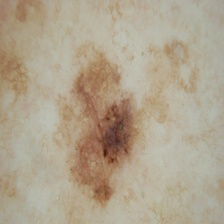

In [10]:
sample_img_malignant

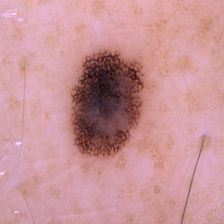

In [11]:
sample_img_benign = PIL.Image.open('train/benign/100.jpg')
sample_img_benign

In [12]:
sample_img_benign.size

(224, 224)

In [13]:
sample_img_malignant.size

(224, 224)

Its mentioned in the data description that each image is of 224*224 dimension

In [14]:
# Plotting subplot

def plot_images(images, target):
  plt.figure(figsize=(9,5))
  plt.suptitle(target, fontsize = 20)
  path = 'train/' + target

  for i in range(12):
    img = PIL.Image.open( path + '/' + images[i] )
    img = np.asarray(img)
    plt.subplot(3,4,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(img)

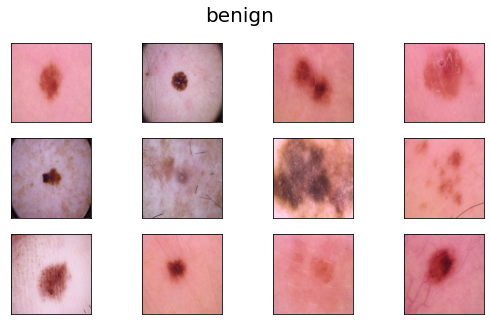

In [15]:
benign_images = os.listdir('train/benign')
plot_images(benign_images, 'benign')

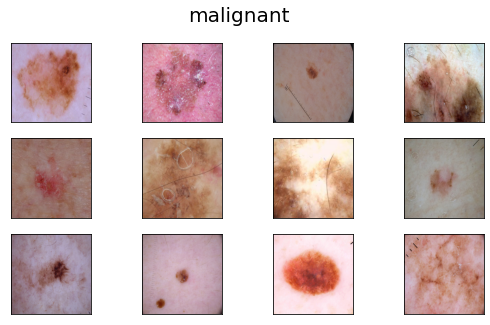

In [16]:
malignant_images = os.listdir('train/malignant')
plot_images(malignant_images, 'malignant')

## Loading Image Dataset

**Keras Image Data Generator**<br>
Official Documentation : https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/image/ImageDataGenerator<br>
Nice Blog : https://www.analyticsvidhya.com/blog/2020/08/image-augmentation-on-the-fly-using-keras-imagedatagenerator/

In [17]:
import keras

In [18]:
train_datagen = keras.preprocessing.image.ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True
)

test_datagen = keras.preprocessing.image.ImageDataGenerator( rescale=1./255 )

In [19]:
train_generator = train_datagen.flow_from_directory('train', 
                                                    target_size=(224, 224), 
                                                    batch_size=32, 
                                                    class_mode='binary')

Found 2637 images belonging to 2 classes.


In [20]:
test_generator = test_datagen.flow_from_directory('test',
                                                  target_size=(224, 224), 
                                                  batch_size=32, 
                                                  class_mode='binary')

Found 660 images belonging to 2 classes.


- Training Images = 2,637
- Test Images = 660

## Building CNN Model

In [21]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

In [22]:
callback = tf.keras.callbacks.EarlyStopping(monitor = 'val_loss', mode = 'min', patience=3,  verbose=1)

### Using Sigmoid Activation in Output Layer

In [23]:
model = Sequential([
    Conv2D(32, 3, input_shape = (224,224,3), activation='relu'),  
    MaxPooling2D(),          
    Conv2D(16, 3, activation='relu'),
    MaxPooling2D(),
    Conv2D(8, 3, activation='relu'),
    MaxPooling2D(),
    Flatten(),
    Dense(512, activation='relu'),
    Dense(256, activation='relu'),
    Dense(1, activation = 'sigmoid')
])

In [24]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 111, 111, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 109, 109, 16)      4624      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 54, 54, 16)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 52, 52, 8)         1160      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 26, 26, 8)        0

In [25]:
model.compile(optimizer='adam', loss=tf.keras.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [26]:
model.fit(train_generator, epochs = 10, validation_data = test_generator, callbacks = [callback])

Epoch 1/10
83/83 [==============================] - 44s 374ms/step - loss: 0.6222 - accuracy: 0.6462 - val_loss: 0.5169 - val_accuracy: 0.7288
Epoch 2/10
83/83 [==============================] - 31s 368ms/step - loss: 0.4962 - accuracy: 0.7581 - val_loss: 0.4118 - val_accuracy: 0.7955
Epoch 3/10
83/83 [==============================] - 31s 368ms/step - loss: 0.4607 - accuracy: 0.7766 - val_loss: 0.4323 - val_accuracy: 0.7712
Epoch 4/10
83/83 [==============================] - 30s 366ms/step - loss: 0.4302 - accuracy: 0.7835 - val_loss: 0.4125 - val_accuracy: 0.8015
Epoch 5/10
83/83 [==============================] - 30s 365ms/step - loss: 0.4357 - accuracy: 0.7888 - val_loss: 0.4094 - val_accuracy: 0.7955
Epoch 6/10
83/83 [==============================] - 30s 366ms/step - loss: 0.3975 - accuracy: 0.8024 - val_loss: 0.4035 - val_accuracy: 0.8076
Epoch 7/10
83/83 [==============================] - 31s 368ms/step - loss: 0.3909 - accuracy: 0.8146 - val_loss: 0.3910 - val_accuracy: 0.7939

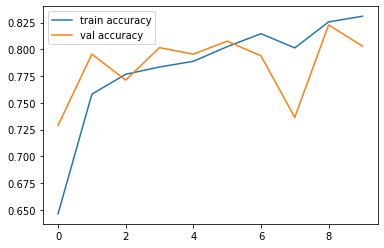

In [27]:
# Plotting Accuracy
plt.plot(model.history.history['accuracy'], label='train accuracy')
plt.plot(model.history.history['val_accuracy'], label='val accuracy')
plt.legend()
plt.show()

### Using Softmax Activation in Output Layer

In [28]:
train_generator1 = train_datagen.flow_from_directory('train', 
                                                    target_size=(224, 224), 
                                                    batch_size=32, 
                                                    class_mode='categorical')

test_generator1 = test_datagen.flow_from_directory('test',
                                                  target_size=(224, 224), 
                                                  batch_size=32, 
                                                  class_mode='categorical')

Found 2637 images belonging to 2 classes.
Found 660 images belonging to 2 classes.


In [29]:
model1 = Sequential([
    Conv2D(32, 3, input_shape = (224,224,3), activation='relu'),  
    MaxPooling2D(),          
    Conv2D(16, 3, activation='relu'),
    MaxPooling2D(),
    Conv2D(8, 3, activation='relu'),
    MaxPooling2D(),
    Flatten(),
    Dense(512, activation='relu'),
    Dense(256, activation='relu'),
    Dense(2, activation = 'softmax')
])

In [30]:
model1.compile(optimizer='adam', loss=tf.keras.losses.CategoricalCrossentropy(), metrics=['accuracy'])

In [31]:
model1.fit(train_generator1, epochs = 10, validation_data = test_generator1, callbacks = [callback])

Epoch 1/10
83/83 [==============================] - 31s 368ms/step - loss: 0.5106 - accuracy: 0.7338 - val_loss: 0.4184 - val_accuracy: 0.7970
Epoch 2/10
83/83 [==============================] - 30s 364ms/step - loss: 0.4480 - accuracy: 0.7831 - val_loss: 0.4369 - val_accuracy: 0.7879
Epoch 3/10
83/83 [==============================] - 31s 368ms/step - loss: 0.4326 - accuracy: 0.7846 - val_loss: 0.4276 - val_accuracy: 0.8030
Epoch 4/10
83/83 [==============================] - 31s 370ms/step - loss: 0.4072 - accuracy: 0.8077 - val_loss: 0.3604 - val_accuracy: 0.8364
Epoch 5/10
83/83 [==============================] - 31s 372ms/step - loss: 0.4195 - accuracy: 0.8005 - val_loss: 0.3924 - val_accuracy: 0.8258
Epoch 6/10
83/83 [==============================] - 31s 368ms/step - loss: 0.3856 - accuracy: 0.8077 - val_loss: 0.4357 - val_accuracy: 0.7894
Epoch 7/10
83/83 [==============================] - 31s 368ms/step - loss: 0.3622 - accuracy: 0.8278 - val_loss: 0.3476 - val_accuracy: 0.8318

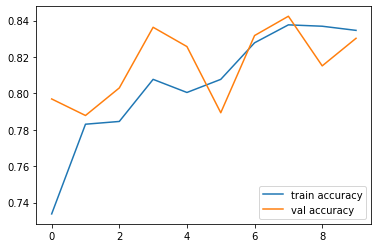

In [32]:
# Plotting Accuracy
plt.plot(model1.history.history['accuracy'], label='train accuracy')
plt.plot(model1.history.history['val_accuracy'], label='val accuracy')
plt.legend()
plt.show()

## Making Predictions

In [33]:
import cv2

In [34]:
test_sample = []

for i in range(5):
  test_img = cv2.imread('test/benign/' + os.listdir('test/benign/')[i])
  test_sample.append(test_img)

for i in range(5):
  test_img = cv2.imread('test/malignant/' + os.listdir('test/malignant/')[i])
  test_sample.append(test_img)

In [35]:
test_sample = np.asarray(test_sample)
test_sample.shape

(10, 224, 224, 3)

**On Model (Sigmoid activation function on output layer)**

In [36]:
prediction = model.predict(test_sample)
prediction

array([[3.6834070e-01],
       [3.6834070e-01],
       [5.0178009e-01],
       [3.6834070e-01],
       [9.9993467e-01],
       [1.0863749e-06],
       [0.0000000e+00],
       [3.6834070e-01],
       [3.9998040e-06],
       [1.9568171e-01]], dtype=float32)

In [49]:
actual_values = [0,0,0,0,0,1,1,1,1,1]
actual_values = np.asarray(actual_values)

model.evaluate(test_sample, actual_values)

1/1 [==============================] - 0s 138ms/step - loss: 13.5613 - accuracy: 0.3000


[13.561286926269531, 0.30000001192092896]

**On Model1 (Softmax Activation function on output layer)**

In [39]:
prediction1 = model1.predict(test_sample)
prediction1

array([[7.5358224e-01, 2.4641769e-01],
       [7.5358224e-01, 2.4641769e-01],
       [2.6007497e-01, 7.3992503e-01],
       [3.8884598e-15, 1.0000000e+00],
       [1.0000000e+00, 6.2785270e-11],
       [1.3985703e-20, 1.0000000e+00],
       [1.0000000e+00, 1.0449182e-28],
       [9.4361830e-01, 5.6381725e-02],
       [9.9357599e-01, 6.4240475e-03],
       [4.6558424e-07, 9.9999952e-01]], dtype=float32)

In [42]:
for i in range(len(prediction1)):
  maxProb = np.argmax(prediction1[i])
  if(maxProb == 0):
    print(i+1, ' Benign')
  else:
    print(i+1, ' Maglignant')

1  Benign
2  Benign
3  Maglignant
4  Maglignant
5  Benign
6  Maglignant
7  Benign
8  Benign
9  Benign
10  Maglignant
